# Mushroom EDA and Poison Prediction

Hey there, mushroom hunters and data enthusiasts! You know that thrilling feeling of foraging for wild mushrooms, but let's face it — sometimes, that excitement comes with a tinge of uncertainty. Which of these fungi are a tasty addition to your dinner and which might lead to a regrettable stomach ache, or worse?

Enter the 'Mushroom Classification' dataset, a blast from the past hailing from the UCI Machine Learning repository. Picture this: descriptions of 23 kinds of gilled mushrooms straight out of The Audubon Society Field Guide to North American Mushrooms (1981), each tagged as either definitely edible, downright poisonous, or chillingly lurking in the 'unknown' territory—a realm we've bundled with the poisonously unsafe ones.

Unlike those catchy rhymes warning us about Poisonous Oak and Ivy, mushroom edibility isn't as straightforward. The guidebook throws a curveball, stating there's no easy rule like "leaflets three, let it be" to navigate this culinary jungle. We're left to rely on keen observations and some serious data crunching.

This notebook is our ticket to deciphering the secrets hidden in mushroom characteristics. We're diving deep, armed with machine learning tricks and analytical mojo, to uncover patterns and insights. Our mission? To demystify the distinctions between what's a tasty treat and what's a potential trip to the ER. So, buckle up for an adventure into the quirky world of mushrooms! We're harnessing the power of data science to answer that burning question: just how sure can our models be about these funky fungi? Stick around as we explore, learn, and hopefully, make your next mushroom-picking adventure a whole lot safer and tastier!

## Importing libraries

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, ParameterGrid
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Importing data

In [59]:
mush = pd.read_csv('mushrooms.csv')
mush

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

## Dataset description

As you can see above, basically the entire dataset consists of letters. This is because the data has almost no numeric measures, consisting majorly of visual characteristics. Of course we will have to deal with this later on, but it's important to keep a brief summary of what's what in here, since this format is mostly unusual.

* **classes**: edible=e, poisonous=p
* **cap-shape**: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
* **cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s
* **cap-color**: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
* **bruises**: bruises=t, no=f
* **odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
* **gill-attachment**: attached=a, descending=d, free=f, notched=n
* **gill-spacing**: close=c, crowded=w, distant=d
* **gill-size**: broad=b, narrow=n
* **gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
* **stalk-shape**: enlarging=e, tapering=t
* **stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
* **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s
* **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s
* **stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* **stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* **veil-type**: partial=p, universal=u
* **veil-color**: brown=n, orange=o, white=w, yellow=y
* **ring-number**: none=n, one=o, two=t
* **ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
* **spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
* **population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
* **habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

## Exploring the data

As we can see below, this is a perfectly filled dataset because we have no missing data. Due to this, we do not have to apply any sort of transformation and we will be able to go straight into modeling. This dataset is different than the usual ones because there are no numbers in it, so if we had missing values we could opt to fill them with the mode (most frequent value) instead of the usual process of filling with the mean.

In [60]:
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [61]:
mush.describe().T

count unique top  freq
class                     8124      2   e  4208
cap-shape                 8124      6   x  3656
cap-surface               8124      4   y  3244
cap-color                 8124     10   n  2284
bruises                   8124      2   f  4748
odor                      8124      9   n  3528
gill-attachment           8124      2   f  7914
gill-spacing              8124      2   c  6812
gill-size                 8124      2   b  5612
gill-color                8124     12   b  1728
stalk-shape               8124      2   t  4608
stalk-root                8124      5   b  3776
stalk-surface-above-ring  8124      4   s  5176
stalk-surface-below-ring  8124      4   s  4936
stalk-color-above-ring    8124      9   w  4464
stalk-color-below-ring    8124      9   w  4384
veil-type                 8124      1   p  8124
veil-color                8124      4   w  7924
ring-number               8124      3   o  7488
ring-type                 8124      5   p  3968
spore-print-color         8124      9   w  2388
population                8124      6   v  4040
habitat                   8124      7   d  3148

## Visualizing the data

We will start by replacing all the initials for the word itself. This will allow better labels to appear on the data visualizations, avoiding the need to always look at the relations set on the `Dataset description` step. We also repeat the `describe` code because it will be clearer now. For example, we now know that the most usual habitat for these mushrooms is the woods (and not the isolated 'w' as before)

In [62]:
class0 = {'e': 'edible', 'p': 'poisonous'}
cap_shape0 = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}
cap_surface0 = {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'}
cap_color0 = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
bruises0 = {'t': 'bruises', 'f': 'no'}
odor0 = {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'}
gill_attachment0 = {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'}
gill_spacing0 = {'c': 'close', 'w': 'crowded', 'd': 'distant'}
gill_size0 = {'b': 'broad', 'n': 'narrow'}
gill_color0 = {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
stalk_shape0 = {'e': 'enlarging', 't': 'tapering'}
stalk_root0 = {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'}
stalk_surface_above_ring0 = {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
stalk_surface_below_ring0 = {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
stalk_color_above_ring0 = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
stalk_color_below_ring0 = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
veil_type0 = {'p': 'partial', 'u': 'universal'}
veil_color0 = {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}
ring_number0 = {'n': 'none', 'o': 'one', 't': 'two'}
ring_type0 = {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'}
spore_print_color0 = {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'}
population0 = {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'}
habitat0 = {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}

column0s = {
    'class': class0,
    'cap-shape': cap_shape0,
    'cap-surface': cap_surface0,
    'cap-color': cap_color0,
    'bruises': bruises0,
    'odor': odor0,
    'gill-attachment': gill_attachment0,
    'gill-spacing': gill_spacing0,
    'gill-size': gill_size0,
    'gill-color': gill_color0,
    'stalk-shape': stalk_shape0,
    'stalk-root': stalk_root0,
    'stalk-surface-above-ring': stalk_surface_above_ring0,
    'stalk-surface-below-ring': stalk_surface_below_ring0,
    'stalk-color-above-ring': stalk_color_above_ring0,
    'stalk-color-below-ring': stalk_color_below_ring0,
    'veil-type': veil_type0,
    'veil-color': veil_color0,
    'ring-number': ring_number0,
    'ring-type': ring_type0,
    'spore-print-color': spore_print_color0,
    'population': population0,
    'habitat': habitat0,
}

for column, renaming in column0s.items():
    mush[column] = mush[column].replace(renaming)

mush.describe().T

count unique       top  freq
class                     8124      2    edible  4208
cap-shape                 8124      6    convex  3656
cap-surface               8124      4     scaly  3244
cap-color                 8124     10     brown  2284
bruises                   8124      2        no  4748
odor                      8124      9      none  3528
gill-attachment           8124      2      free  7914
gill-spacing              8124      2     close  6812
gill-size                 8124      2     broad  5612
gill-color                8124     12      buff  1728
stalk-shape               8124      2  tapering  4608
stalk-root                8124      5   bulbous  3776
stalk-surface-above-ring  8124      4    smooth  5176
stalk-surface-below-ring  8124      4    smooth  4936
stalk-color-above-ring    8124      9     white  4464
stalk-color-below-ring    8124      9     white  4384
veil-type                 8124      1   partial  8124
veil-color                8124      4     white  7924
ring-number               8124      3       one  7488
ring-type                 8124      5   pendant  3968
spore-print-color         8124      9     white  2388
population                8124      6   several  4040
habitat                   8124      7     woods  3148

### Count of values by column

With a bar plot for each column in the dataset - except for veil-type as it only has 1 value - we can clearly see not only the distribution among the unique values for each one, but also the relation with the poison. Some columns are good indicators of poisonous mushrooms:

- Bruises = No
- Odor = Creosote, Fishy, Foul, Musty, Pungent, Spicy
- Gill size = Narrow
- Gill color = Buff
- Stalk surface = Silky
- Stalk color = Brown, Buff, Cinnamon
- Ring type = Large
- Spore print color = Chocolate, White
- Habitat = Paths

When we start building our models, they will most likely capture these relations and use them to their advantage, so there's no need for us humans to note this. However, as we progress through the EDA cycle, it might be a good idea to create these references. It's a good practice that may help us a lot when analyzing other datasets.

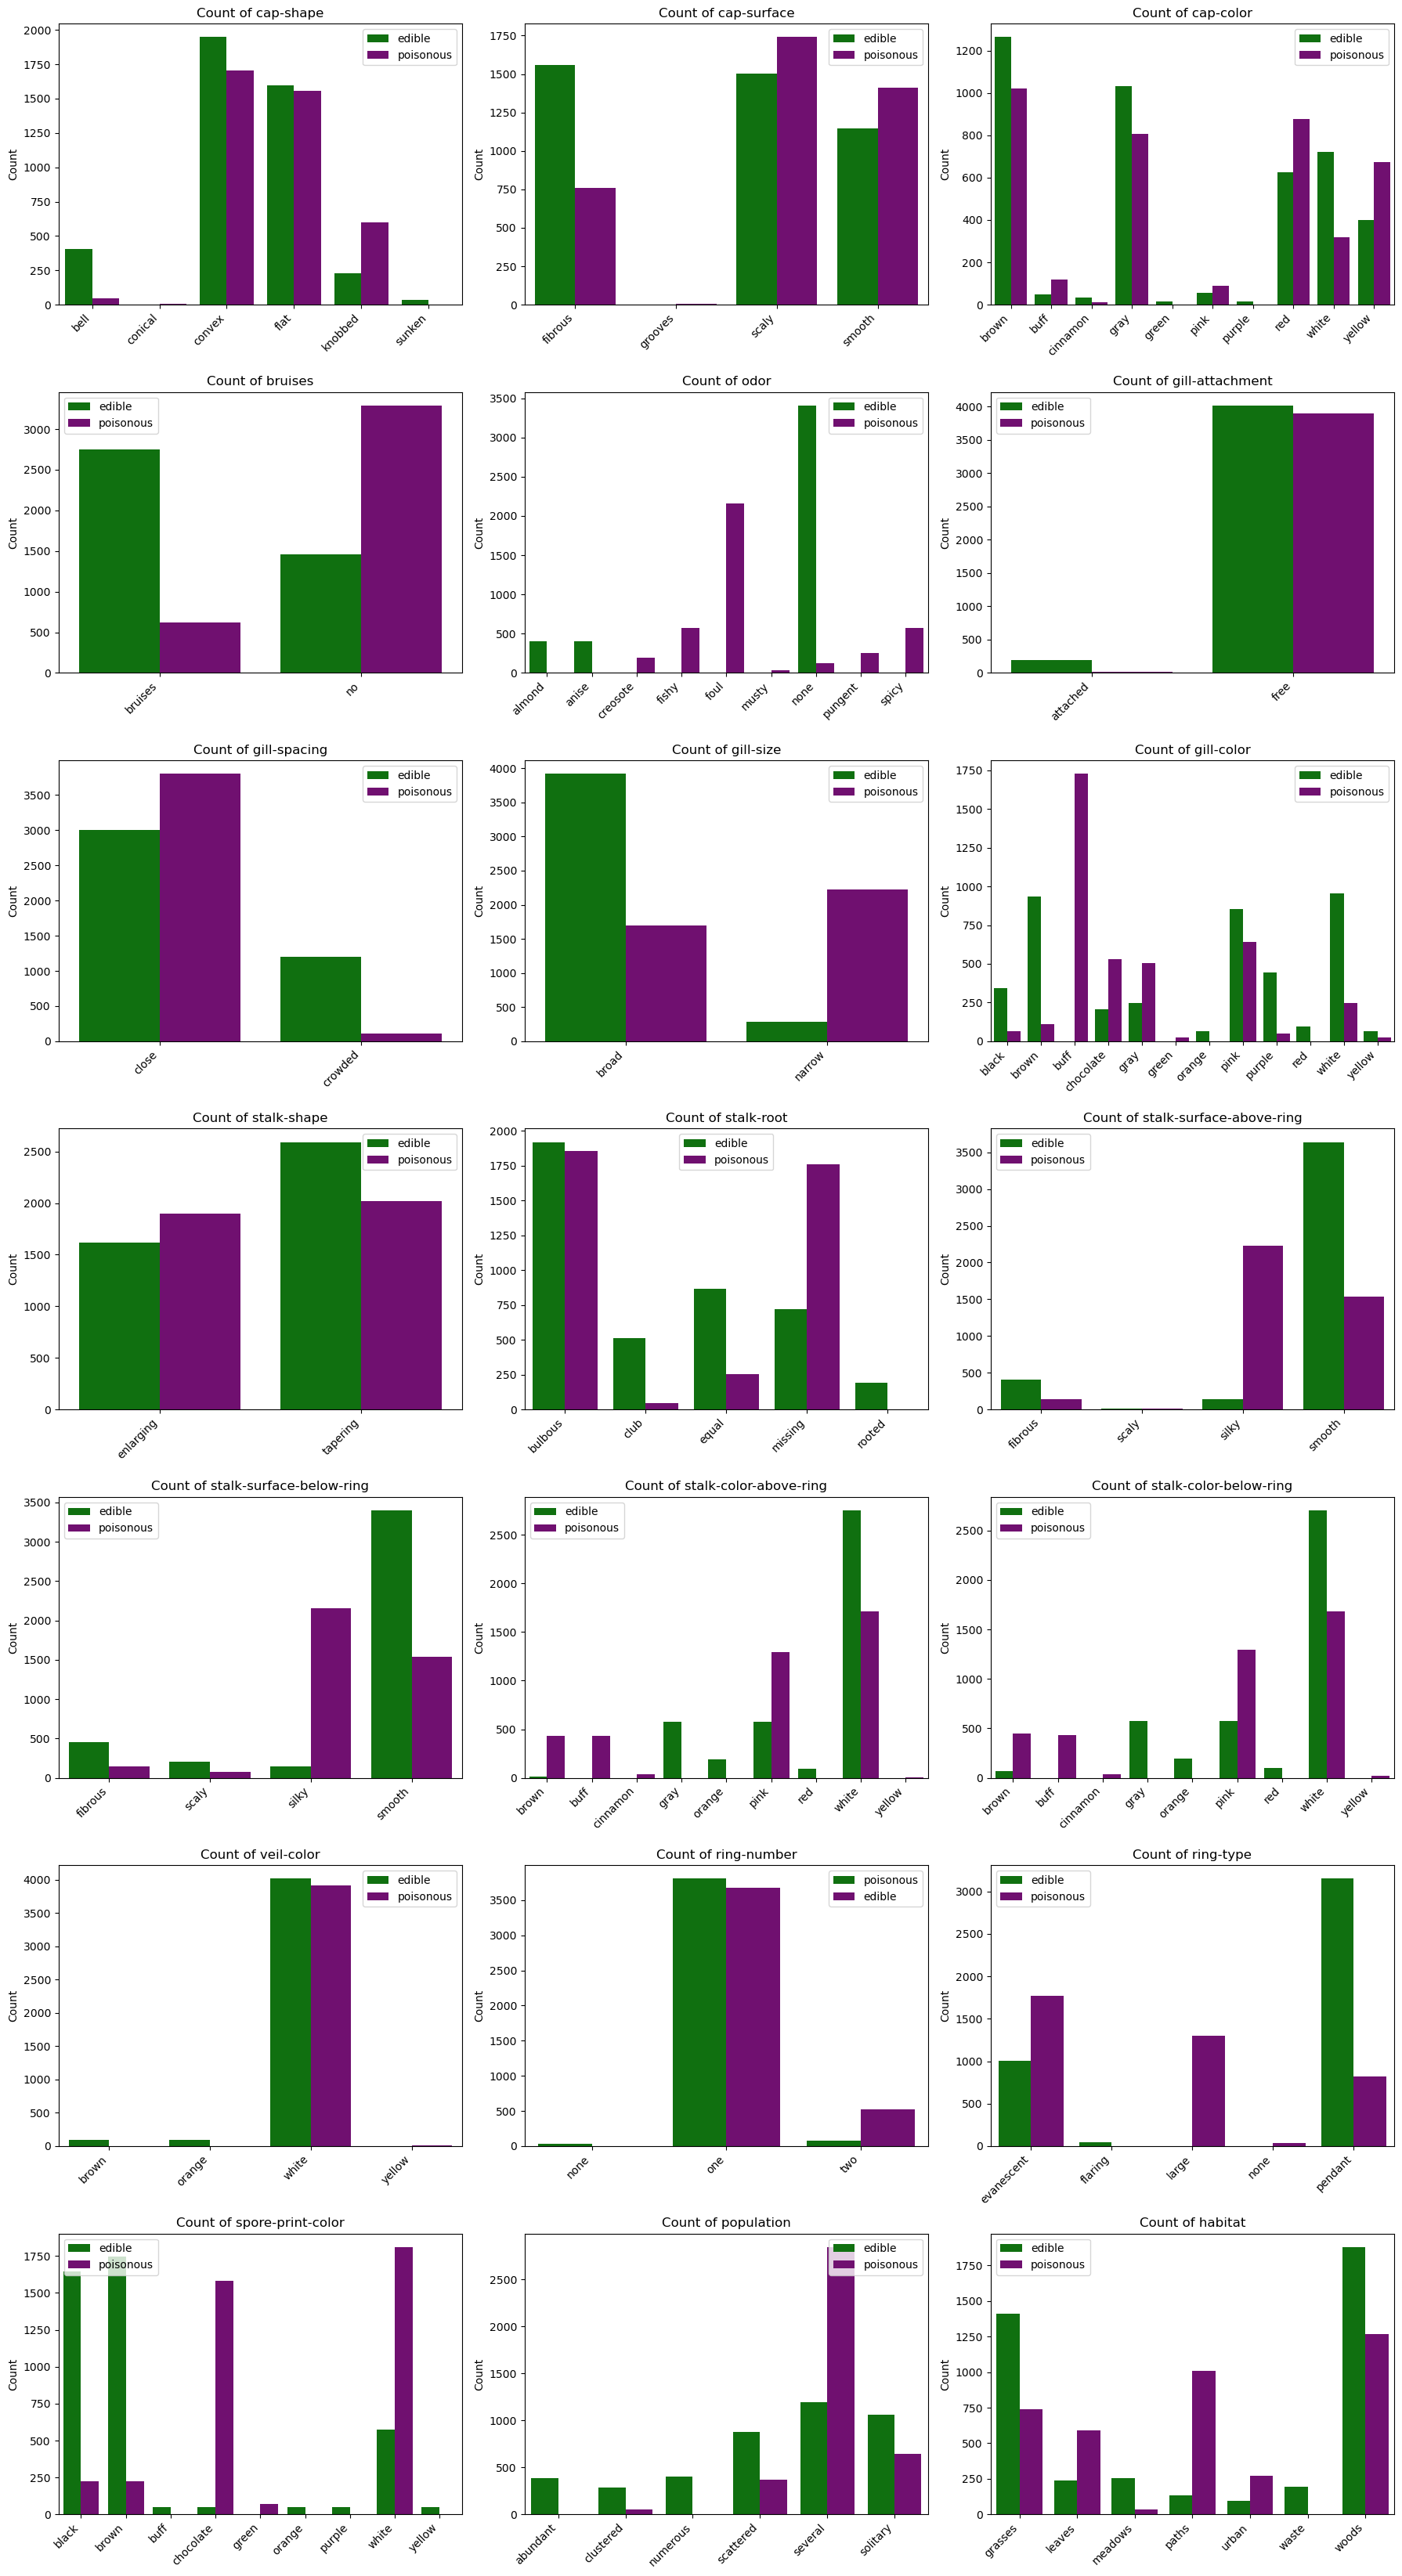

In [63]:
mush.drop('veil-type',axis=1,inplace=True)

def plot_count(x, ax):
    group = mush.groupby([f'{x}', 'class'])['class'].count().reset_index(name='Count')
    sns.barplot(data=group, x=x, y='Count', hue='class', palette=['green', 'purple'], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'Count of {x}')

cols = mush.columns.tolist()
cols_to_plot = [col for col in cols[1:] if col != 'veil-type']  # Exclude 'veil-type'

fig, axes = plt.subplots(7, 3, figsize=(18, 3 * 11))

for index, column in enumerate(cols_to_plot):
    row = index // 3 
    col = index % 3
    ax = axes[row, col]
    plot_count(column, ax)
    legend = ax.get_legend()
    legend.set_title('')
    ax.set_xlabel('')
    
plt.tight_layout()
plt.show()

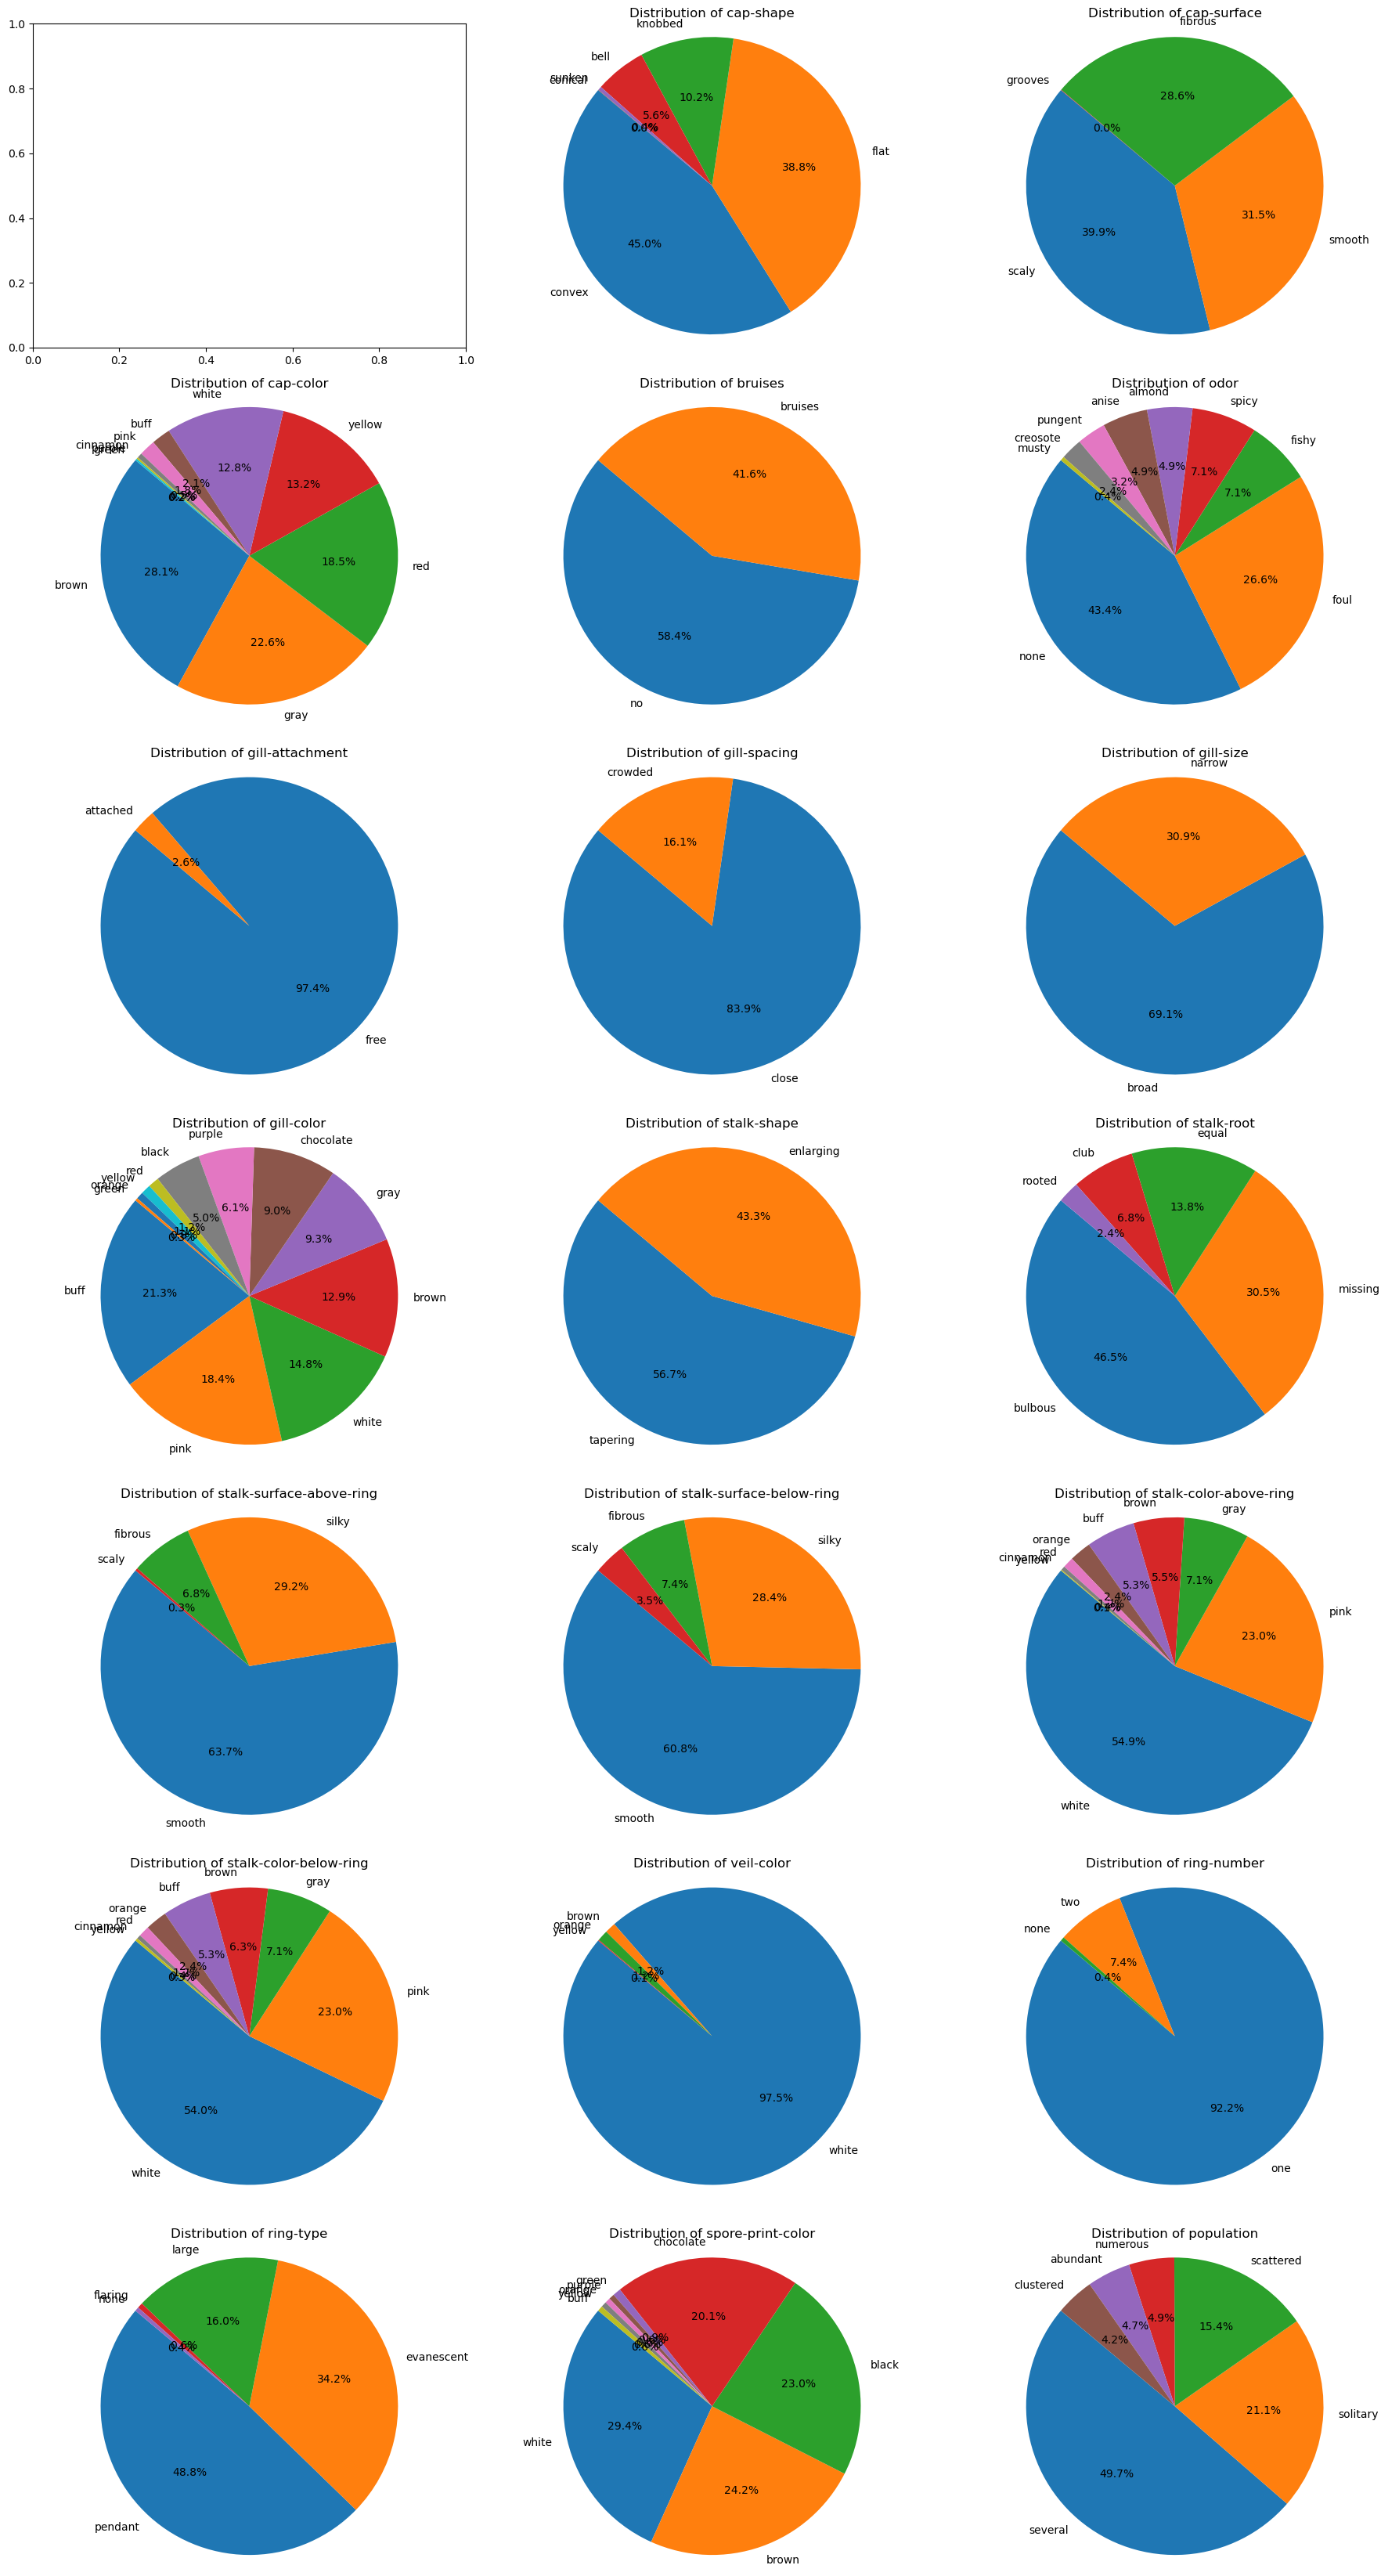

In [67]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(7, 3, figsize=(18, 33))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through each column in the DataFrame
for i, column in enumerate(mush.columns):
    if column != 'class' and i < 7 * 3:  # Exclude 'class' column if present and limit to the number of subplots
        counts = mush[column].value_counts()  # Count occurrences of each category
        ax = axes[i]  # Select the current axis
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        ax.set_title(f'Distribution of {column}')
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Heatmap

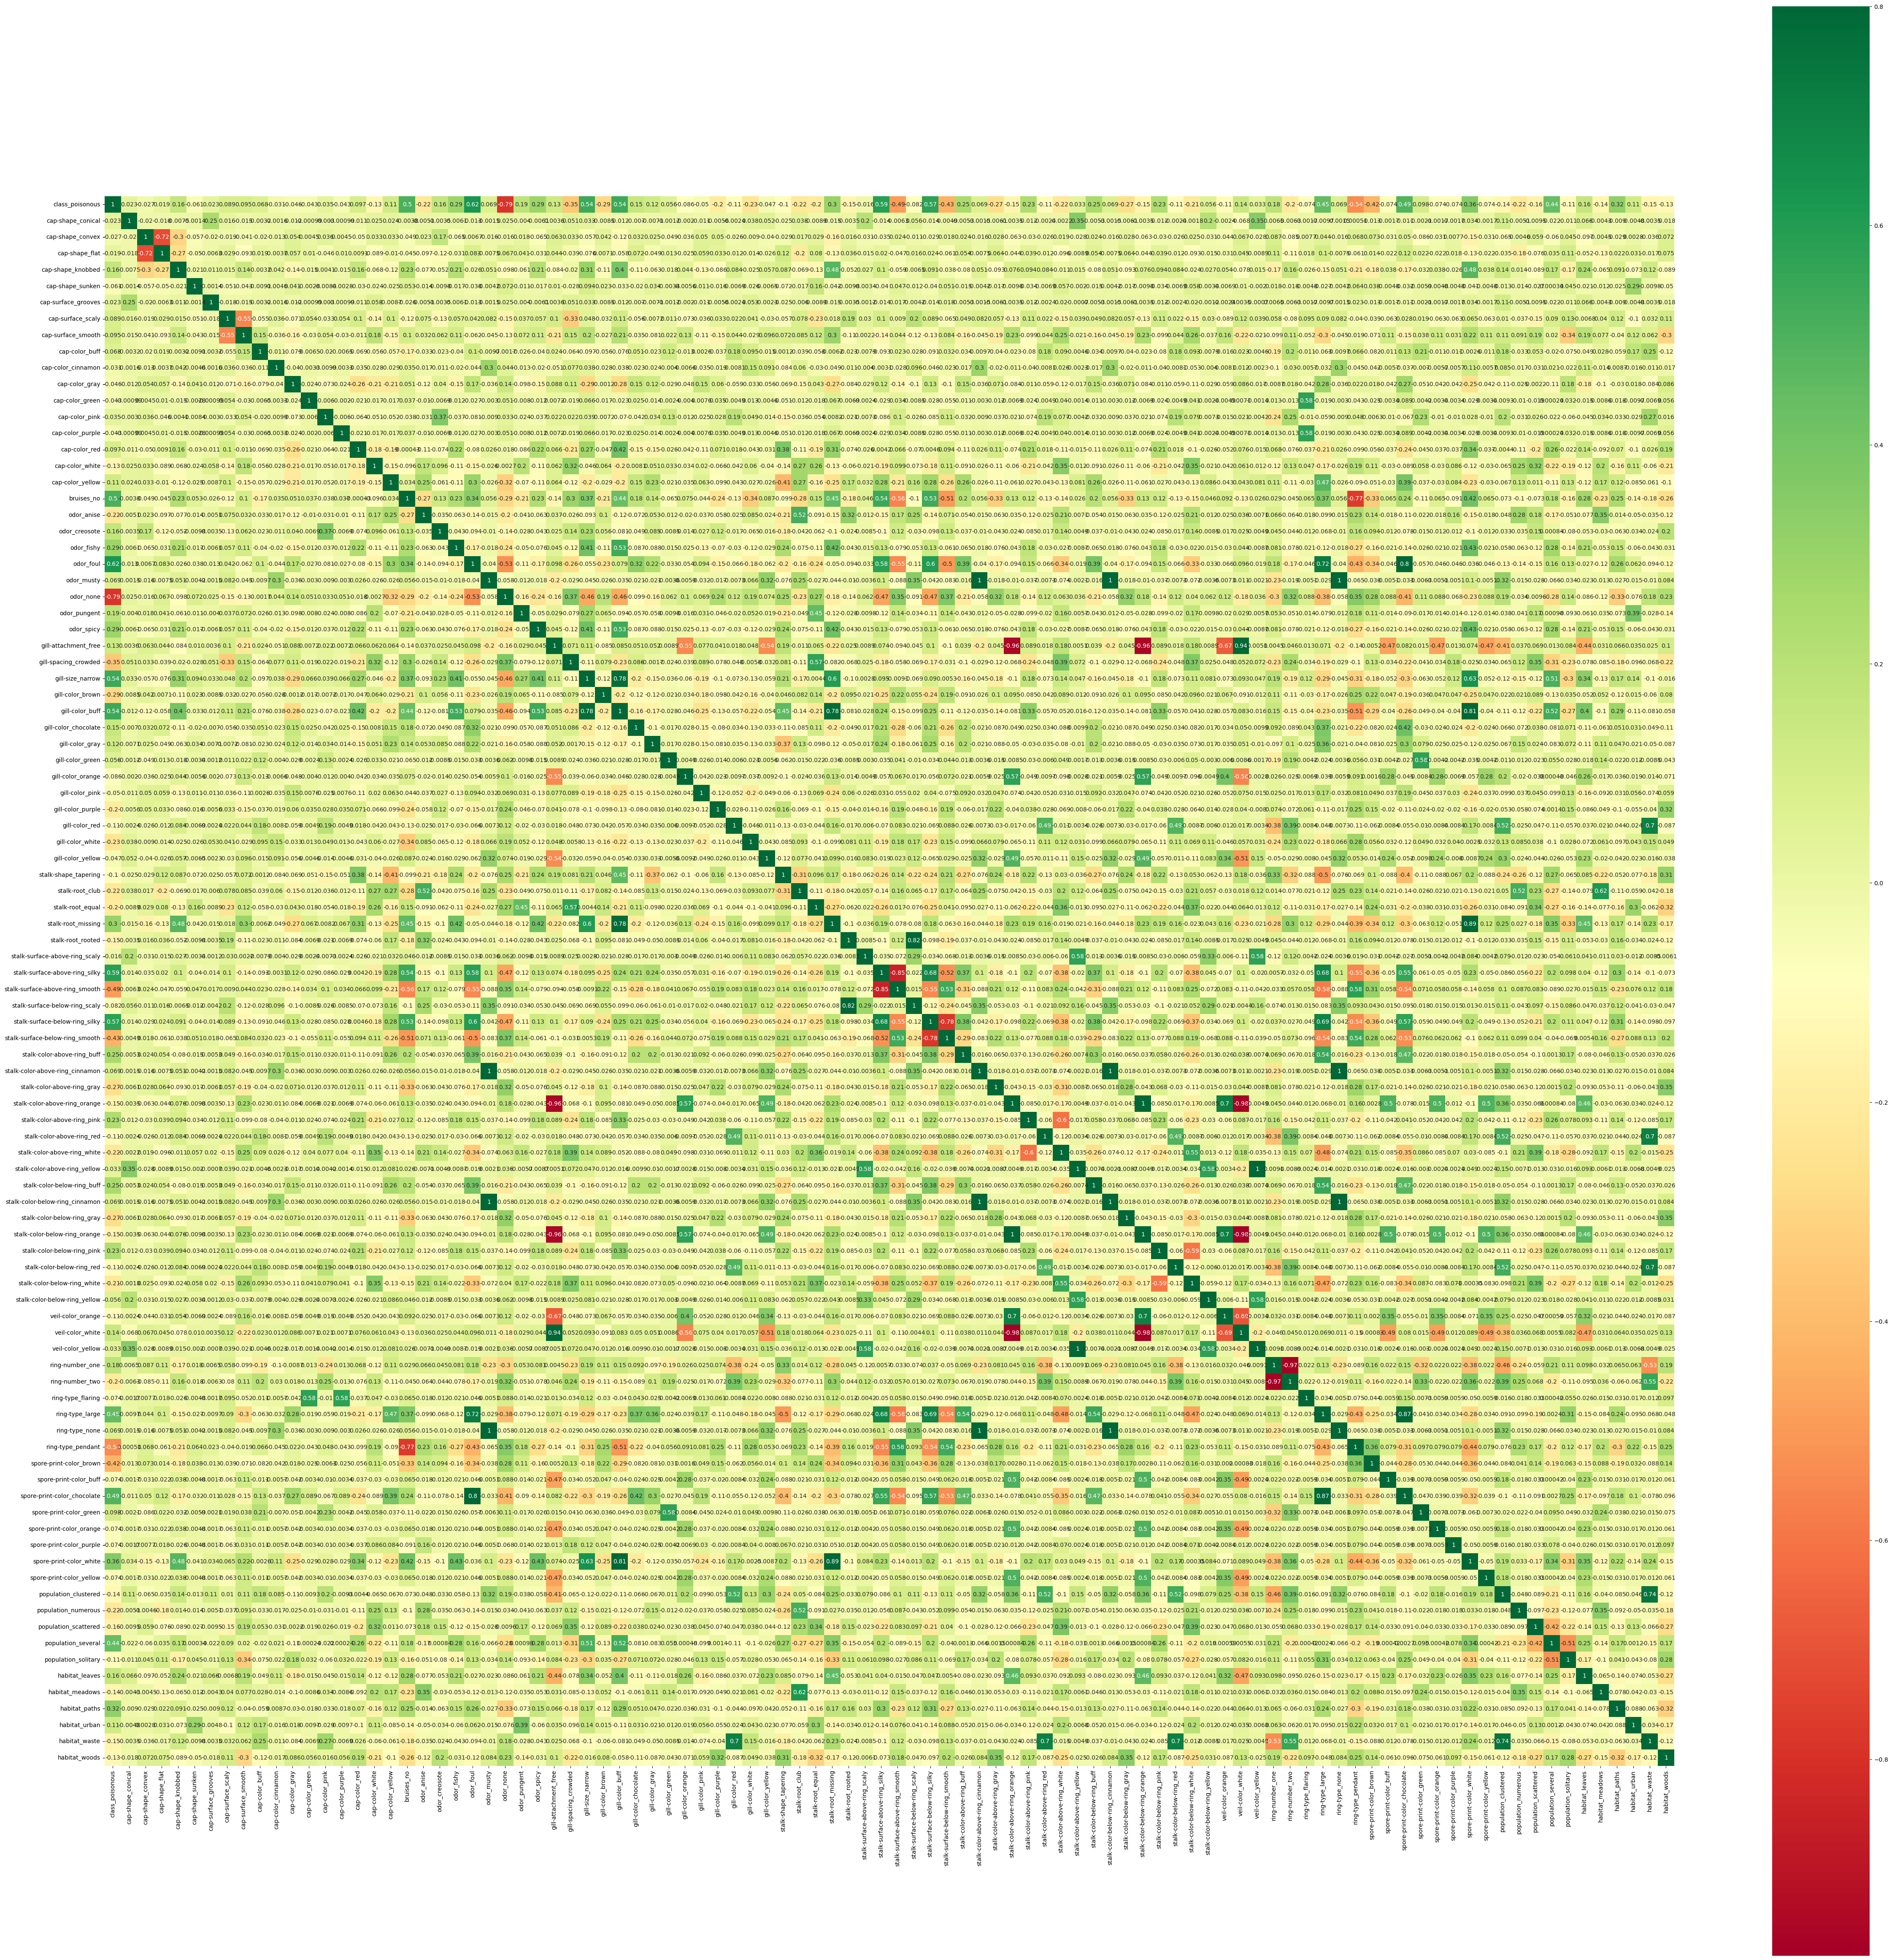

In [68]:
mush = pd.get_dummies(mush, dtype=float, drop_first=True)
plt.figure(figsize=(60,60))
sns.heatmap(mush.corr(), vmax=0.8, annot=True, square=True, cmap='RdYlGn');

### Strongest correlations

In [85]:
correlation_matrix = mush.corr()
correlations = correlation_matrix.stack().reset_index()
correlations.columns = ['Attribute 1', 'Attribute 2', 'Correlation']
correlations = correlations[(correlations['Attribute 1'] == 'class_poisonous') & (correlations['Attribute 2'] != 'class_poisonous')]
correlations.sort_values(by='Correlation').tail(10)

top6 = correlations.sort_values(by='Correlation').head(6)
bottom7 = correlations.sort_values(by='Correlation').tail(7)
strongest_correlations = pd.concat([top6, bottom7])

strongest_correlations

Attribute 1                      Attribute 2  Correlation
24  class_poisonous                        odor_none    -0.785557
76  class_poisonous                ring-type_pendant    -0.540469
48  class_poisonous  stalk-surface-above-ring_smooth    -0.491314
51  class_poisonous  stalk-surface-below-ring_smooth    -0.425444
77  class_poisonous          spore-print-color_brown    -0.416645
28  class_poisonous             gill-spacing_crowded    -0.348387
79  class_poisonous      spore-print-color_chocolate     0.490229
18  class_poisonous                       bruises_no     0.501530
31  class_poisonous                  gill-color_buff     0.538808
29  class_poisonous                 gill-size_narrow     0.540024
50  class_poisonous   stalk-surface-below-ring_silky     0.573524
47  class_poisonous   stalk-surface-above-ring_silky     0.587658
22  class_poisonous                        odor_foul     0.623842

## Data modeling

In [112]:
X = mush.drop(columns=['class_poisonous']).values
y = mush[['class_poisonous']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

### K-Nearest Neighbors (KNN)

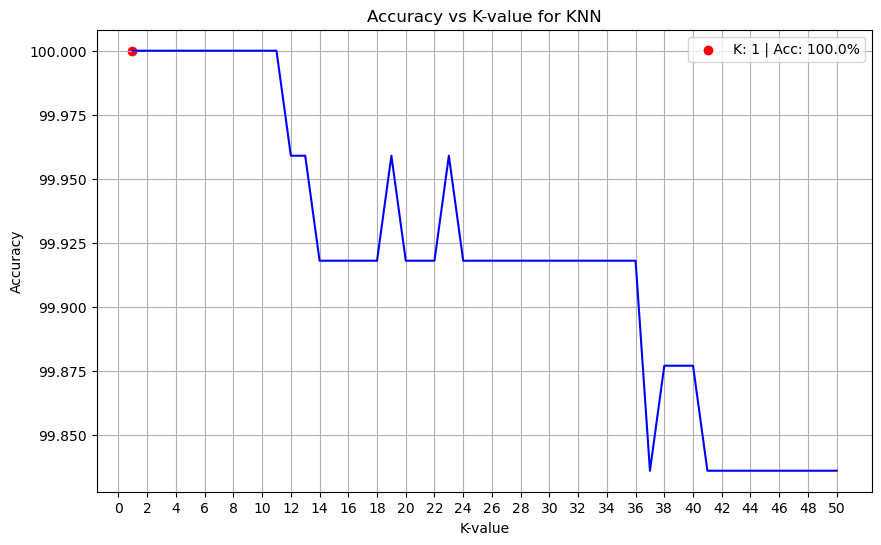

Accuracy: 100.0%

Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1259
         1.0       1.00      1.00      1.00      1179

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Confusion Matrix
 [[1259    0]
 [   0 1179]]


In [113]:
KNN_results = []

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.ravel())  # Using ravel() to convert to 1D array
    yhat = knn.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    KNN_results.append({'K-value': k, 'Accuracy': accuracy*100})

KNN_accuracy_df = pd.DataFrame(KNN_results)

# Find index of maximum accuracy
KNN_max_index = KNN_accuracy_df['Accuracy'].idxmax()
KNN_k_max = int(KNN_accuracy_df.loc[KNN_max_index]['K-value'])
KNN_acc_max = KNN_accuracy_df.loc[KNN_max_index]['Accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(KNN_accuracy_df['K-value'], KNN_accuracy_df['Accuracy'], linestyle='-', color='b')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K-value for KNN')
plt.scatter(KNN_k_max-0.05, KNN_acc_max, color='red', label=f'K: {KNN_k_max:.0f} | Acc: {KNN_acc_max:.1f}%')
plt.legend()
plt.xticks(range(0, 51, 2))
plt.grid(True)
plt.show()

# Creating the model using the optimum value for K
KNN_model = KNeighborsClassifier(n_neighbors = KNN_k_max)
KNN_model.fit(X_train, y_train.ravel())
KNN_pred = KNN_model.predict(X_test)
KNN_accuracy = accuracy_score(y_test.ravel(), KNN_pred)
KNN_cr = classification_report(y_test.ravel(), KNN_pred)
KNN_cm = confusion_matrix(y_test.ravel(), KNN_pred)

# Printing the metrics
print("Accuracy:", f"{KNN_accuracy * 100:.1f}%\n")
print("Classification Report\n", KNN_cr)
print("Confusion Matrix\n", KNN_cm)

### Decision Tree

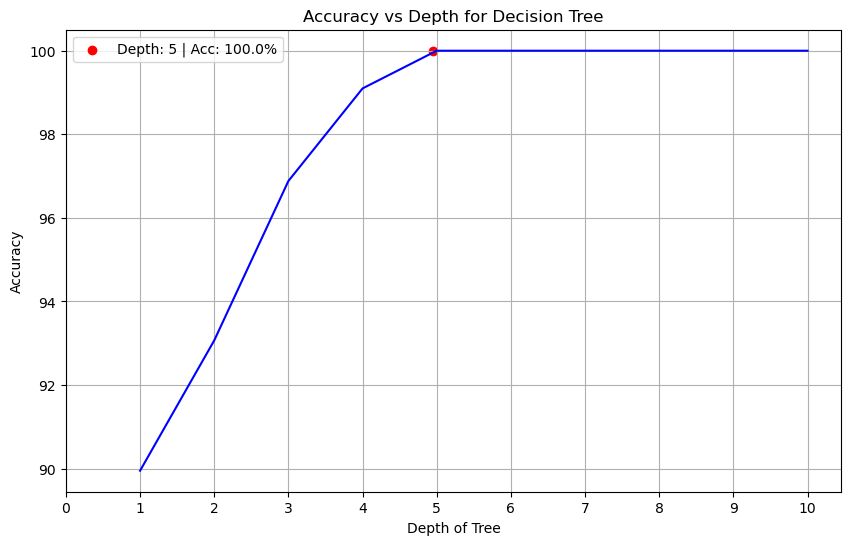

Accuracy: 100.0%

Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1259
         1.0       1.00      1.00      1.00      1179

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Confusion Matrix
 [[1259    0]
 [   0 1179]]


In [114]:
DT_results = []

for i in range(1,11):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train, y_train.ravel())
    yhat = clf_tree.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    DT_results.append({'Depth': i, 'Accuracy': accuracy*100})
    
DT_accuracy_df = pd.DataFrame(DT_results)

# Find index of maximum accuracy
DT_max_index = DT_accuracy_df['Accuracy'].idxmax()
DT_depth_max = int(DT_accuracy_df.loc[DT_max_index]['Depth'])
DT_acc_max = DT_accuracy_df.loc[DT_max_index]['Accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(DT_accuracy_df['Depth'], DT_accuracy_df['Accuracy'], linestyle='-', color='b')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth for Decision Tree')
plt.scatter(DT_depth_max-0.05, DT_acc_max, color='red', label=f'Depth: {DT_depth_max:.0f} | Acc: {DT_acc_max:.1f}%')
plt.legend()
plt.xticks(range(0, 11, 1))
plt.grid(True)
plt.show()

# Creating the model using the optimum value for Depth
DT_model = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = DT_depth_max)
DT_model.fit(X_train, y_train.ravel())
DT_pred = DT_model.predict(X_test)
DT_accuracy = accuracy_score(y_test.ravel(), DT_pred)
DT_cr = classification_report(y_test.ravel(), DT_pred)
DT_cm = confusion_matrix(y_test.ravel(), DT_pred)

# Printing the metrics
print("Accuracy:", f"{DT_accuracy * 100:.1f}%\n")
print("Classification Report\n", DT_cr)
print("Confusion Matrix\n", DT_cm)

### Random Forest

Best combination
Depth           6.0
Estimators     12.0
Accuracy      100.0
Name: 86, dtype: float64


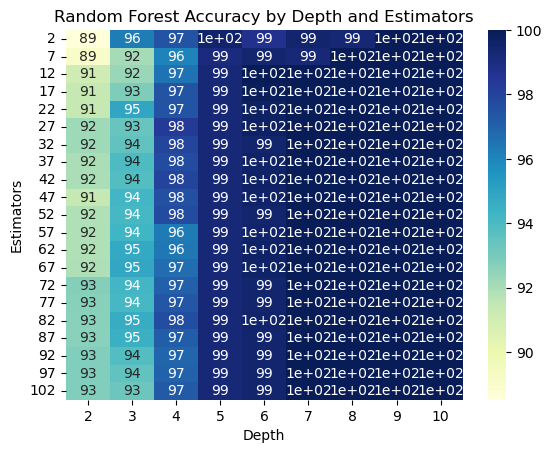

Accuracy: 100.0%

Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1259
         1.0       1.00      1.00      1.00      1179

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Confusion Matrix
 [[1259    0]
 [   0 1179]]


In [115]:
max_depth_values = list(range(2, 11))  # Test max_depth from 2 to 10
n_estimators_values = list(range(2, 103, 5))  # Test n_estimators from 2 to 102 with step size 5

RF_results = []

for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        clf_forest = RandomForestClassifier(
            n_estimators=n_estimators, 
            criterion="entropy", 
            random_state=100, 
            max_depth=max_depth
        )
        clf_forest.fit(X_train, y_train.ravel())
        yhat = clf_forest.predict(X_test)
        accuracy = accuracy_score(y_test, yhat)
        RF_results.append({'Depth': max_depth, 'Estimators': n_estimators, 'Accuracy': accuracy*100})

RF_accuracy_df = pd.DataFrame(RF_results)

# Find index of maximum accuracy
RF_max_index = RF_accuracy_df['Accuracy'].idxmax()
RF_depth_max = int(RF_accuracy_df.loc[RF_max_index]['Depth'])
RF_estimators_max = int(RF_accuracy_df.loc[RF_max_index]['Estimators'])
RF_acc_max = RF_accuracy_df.loc[RF_max_index]['Accuracy']

# Visualizing the best combination
print("Best combination")
print(RF_accuracy_df.loc[RF_accuracy_df['Accuracy'].idxmax()])

# Visualizing all the combinations
RF_pivot_table = pd.pivot_table(RF_accuracy_df, values='Accuracy', index='Estimators', columns='Depth')
sns.heatmap(RF_pivot_table, cmap='YlGnBu', annot=True)
plt.title('Random Forest Accuracy by Depth and Estimators')
plt.xlabel('Depth')
plt.ylabel('Estimators')
plt.show()

# Creating the model using the optimum value for Depth
RF_model = RandomForestClassifier(n_estimators=RF_estimators_max, criterion="entropy", random_state=100, max_depth=RF_depth_max)
RF_model.fit(X_train, y_train.ravel())
RF_pred = RF_model.predict(X_test)
RF_accuracy = accuracy_score(y_test.ravel(), RF_pred)
RF_cr = classification_report(y_test.ravel(), RF_pred)
RF_cm = confusion_matrix(y_test.ravel(), RF_pred)

# Printing the metrics
print("Accuracy:", f"{RF_accuracy * 100:.1f}%\n")
print("Classification Report\n", RF_cr)
print("Confusion Matrix\n", RF_cm)

## Conclusion

This dataset is somewhat unrealistic in terms of machine learning. Real-life data would hardly ever see a model reaching 100% accuracy. Doing some tests you can see that even bumping test size to 70% the models still manage to reach perfect accuracy, meaning they never miss a single mushroom. Although reaching this level of accuracy might sound exciting to a newcomer, it kinda ruins the process of modeling. There are no need to test various models and spend time on GridSearch for the best hyperparameters and you reach no official conclusion.

However, this project still remains a good idea for those who are starting in the Data Analytics field. Its main characteristic of being full categorical (no numbers) is a fun challenge to take early on.